# Data Analysis: Bloomington Animal Care and Control Annual Statistics

## The Data

The dataset for this simple analysis was pulled from the City of Bloomington website. It contains annual statistics (2004 to 2021) for Bloomington's Animal Care and Control Division (ACC). I chose this dataset because I wanted to start my post-bootcamp data analysis with a small, easily manageable dataset; this dataset only has 18 rows. Additionally, I wanted to use data from a domain that I was familiar with. I was leaning towards a dataset concerning cookies but decided to use animal welfare data since I worked in the field for over 12 years. Though, cookies will soon have their time.

Before loading this dataset as a dataframe, using SQL (PostgreSQL), I cleansed the data because all data should be clean. So if your data is dirty, I want nothing to do with it.

![UncleanGIF](https://media1.giphy.com/media/PW9A4XrDarYEU/200.gif "unclean")

Except I do because cleaning data is fun.

I also added some columns to calculate some [values that matter](https://www.humanesociety.org/sites/default/files/archive/assets/pdfs/Live_Release_Rate_Formulas.pdf).

- **live_outcomes** - The total number of adoptions, animals returned to their owners, and transfers to other organizations.
- **all_outcomes** - Total number of outcomes.
- **live_release_rate** - The total number of live outcomes divided by the total number of outcomes.

In [1]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#acc = pd.read_csv("https://data.bloomington.in.gov/dataset/9a0fc126-0775-4952-96ff-76ece67ffbc7/resource/7a847ec2-31c6-48e3-b0bc-02af2fa94587/download/animal-care-and-control-data-set-2004-2021.csv")
df = pd.read_csv ('C:/Projects/bloom_acc_clean.csv', parse_dates=['stat_year'], dayfirst=False)
df['stat_year'] = df['stat_year'].dt.strftime('%Y')

Libraries are loaded. Dataset is loaded. Though I already know that the dataset is relatively small and I already cleansed the data, looking at a summary of the dataframe is the cool thing to do.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stat_year            18 non-null     object 
 1   num_employees        18 non-null     float64
 2   num_div_vehicles     18 non-null     int64  
 3   annual_budget        18 non-null     int64  
 4   owner_surrenders     18 non-null     int64  
 5   strays               18 non-null     int64  
 6   aco_impounds         18 non-null     int64  
 7   total_animal_intake  18 non-null     int64  
 8   adoptions            18 non-null     int64  
 9   rto                  18 non-null     int64  
 10  euthanized           18 non-null     int64  
 11  transported          18 non-null     int64  
 12  fosters              18 non-null     int64  
 13  service_calls        18 non-null     int64  
 14  emergency_callouts   18 non-null     int64  
 15  grants_received      18 non-null     float

I originally had the money columns (annual_budget, grants_received, and adoption_rev) as currency columns using the MONEY data type in SQL. However, that caused the values in those columns to come over with a data type of "object". So, in SQL, I udpated the columns to the NUMERIC data type which then caused the values to come over with a data type of "float". I found this to be acceptable.

Also, the stat_year column currently has a data type of "object" which I am OK with for this analysis. If this were a more in-depth analysis or if I had actual dates and times, then the column would be updated.

## Exploration

I want to get more familiar with the data and the organization. The data is sorted by the "stat_year" column in ascending order (I know this because of the cleaning step). So, I will take a look at the top five rows, the bottom five rows, and a description of the data to learn fun things.

In [4]:
#df['stat_year'] = pd.to_datetime(df['stat_year'], format='%Y')
df.head()

,stat_year,num_employees,num_div_vehicles,annual_budget,owner_surrenders,strays,aco_impounds,total_animal_intake,adoptions,rto,euthanized,transported,fosters,service_calls,emergency_callouts,grants_received,adoption_rev,live_outcomes,all_outcomes,live_release_rate
0,2004,15.150,3,782931,2351,3257,0,5608,1896,558,2277,592,0,0,150,0.0,13146.0,3046,5323,0.57
1,2005,16.600,3,760206,2104,3038,0,5142,1866,542,1724,670,380,1525,150,18925.0,112649.0,3078,4802,0.64
2,2006,16.600,3,1030661,2361,2800,0,5161,1737,554,1856,657,700,2900,150,5555.0,105401.0,2948,4804,0.61
3,2007,17.230,3,1062946,2294,2519,0,4813,1825,523,1753,539,800,2950,150,0.0,100170.0,2887,4640,0.62
4,2008,17.725,3,1132507,2131,2690,0,4821,1849,544,1721,431,600,2700,150,11215.0,106627.0,2824,4545,0.62


In [5]:
df.tail()

,stat_year,num_employees,num_div_vehicles,annual_budget,owner_surrenders,strays,aco_impounds,total_animal_intake,adoptions,rto,euthanized,transported,fosters,service_calls,emergency_callouts,grants_received,adoption_rev,live_outcomes,all_outcomes,live_release_rate
13,2017,17.50,3,1469719,1706,1335,480,3598,2297,562,267,215,830,2125,238,0.0,92227.0,3074,3341,0.92
14,2018,17.70,3,1525425,1637,1348,616,3629,2281,615,224,207,926,1559,290,0.0,97930.5,3103,3327,0.93
15,2019,17.75,4,1752669,1927,1354,532,3899,2684,548,274,62,1159,1440,235,0.0,108867.0,3294,3568,0.92
16,2020,19.30,4,1903971,1038,1011,655,2760,1946,412,103,107,972,1571,206,3000.0,102622.5,2465,2568,0.96
17,2021,19.30,4,1741434,1261,1110,581,3048,2176,419,145,37,1101,1632,240,5000.0,102637.5,2632,2777,0.95


In [6]:
df.describe()

,num_employees,num_div_vehicles,annual_budget,owner_surrenders,strays,aco_impounds,total_animal_intake,adoptions,rto,euthanized,transported,fosters,service_calls,emergency_callouts,grants_received,adoption_rev,live_outcomes,all_outcomes,live_release_rate
count,18.000000,18.000000,1.800000e+01,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,17.611389,3.166667,1.275899e+06,1896.277778,2007.333333,211.166667,4163.833333,2101.222222,525.166667,987.444444,268.222222,715.500000,2138.555556,184.111111,5489.444444,100138.298889,2894.611111,3882.055556,0.767778
std,1.120180,0.383482,3.098324e+05,350.491555,689.777031,276.194571,748.210748,251.172675,52.439601,703.743204,211.281957,262.154927,735.582860,53.630423,9611.563386,22392.646952,214.752974,730.628213,0.138035
min,15.150000,3.000000,7.602060e+05,1038.000000,1011.000000,0.000000,2760.000000,1737.000000,412.000000,103.000000,37.000000,0.000000,0.000000,97.000000,0.000000,13146.000000,2465.000000,2568.000000,0.570000
25%,16.990000,3.000000,1.134236e+06,1771.500000,1363.750000,0.000000,3731.750000,1893.750000,514.500000,301.000000,116.000000,599.250000,1586.250000,150.000000,0.000000,101309.500000,2732.000000,3456.000000,0.625000
50%,17.600000,3.000000,1.206732e+06,1904.500000,2080.000000,0.000000,4012.000000,2083.500000,543.000000,839.000000,192.000000,721.500000,2409.500000,160.500000,0.000000,105432.500000,2917.500000,3720.500000,0.780000
75%,17.963750,3.000000,1.436172e+06,2124.250000,2476.500000,488.250000,4757.500000,2275.250000,557.000000,1693.750000,392.000000,822.500000,2601.250000,234.500000,7101.500000,109087.560000,3050.500000,4466.750000,0.912500
max,20.000000,4.000000,1.903971e+06,2361.000000,3257.000000,655.000000,5608.000000,2684.000000,615.000000,2277.000000,670.000000,1159.000000,2950.000000,290.000000,37498.000000,113070.000000,3294.000000,5323.000000,0.960000


A quick look at the data suggests the following tidbits:

- Bloomington ACC did not always impound animals. The data shows that for at least the first five years, they had no impounds.
- The year 2020 shows some noticeable changes in numbers across multiple columns. For example, the number of incoming stray animals stayed steady (at around 1,300) between 2017 and 2019 but then dropped by 25% in 2020.
- Their live release rate rose from 57% in 2004 to 95% in 2020. Though, their total intake seems to have consistently dropped over the years.

## Visualization

To make the data a little more digestable and to get more info on the aforementioned tidbits, I will activate graph mode!

Text(0.5, 1.0, 'Stray Intake (2004-21)')

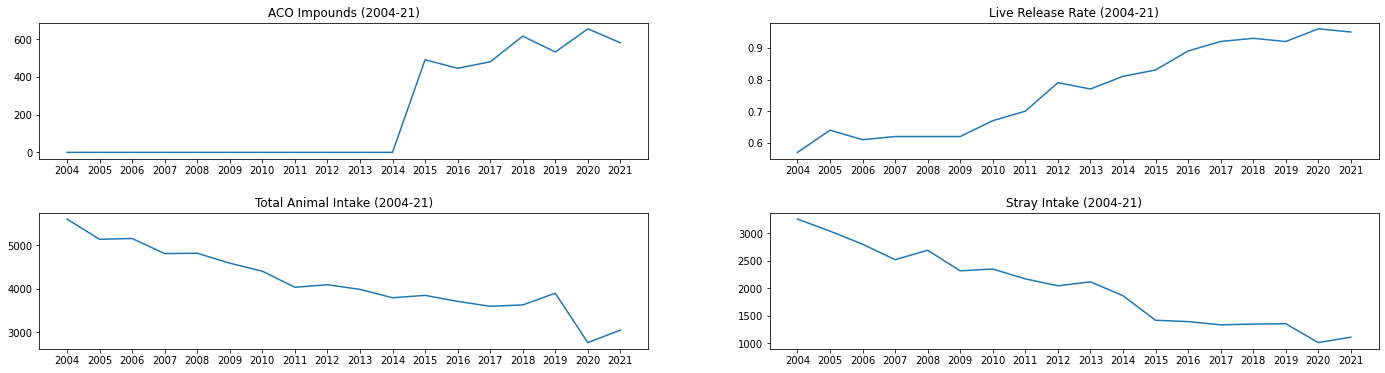

In [7]:
fig, axis = plt.subplots(2, 2, figsize = (24, 6))
fig.subplots_adjust(hspace = .4)

axis[0, 0].plot(df['stat_year'], df['aco_impounds'])
axis[0, 0].set_title('ACO Impounds (2004-21)')

axis[0, 1].plot(df['stat_year'], df['live_release_rate'])
axis[0, 1].set_title('Live Release Rate (2004-21)')

axis[1, 0].plot(df['stat_year'], df['total_animal_intake'])
axis[1, 0].set_title('Total Animal Intake (2004-21)')

axis[1, 1].plot(df['stat_year'], df['strays'])
axis[1, 1].set_title('Stray Intake (2004-21)')

After looking at the above graphs, those tidbits appear a little more clearly now:

- The 'ACO Impounds (2004-21)' chart confirms that Bloomington ACC did not always impound animals; ACO impounds started some time between 2014 and 2015.
- The 'Live Release Rate (2004-21)' and 'Total Animal Intake (2004-21)' charts further suggest that the live release rate and total animal intake are negatively correlated.

Since someone brought up correlation, I will create a heatmap because it is an excellent way to easily view correlations. Also, heatmaps are pretty.

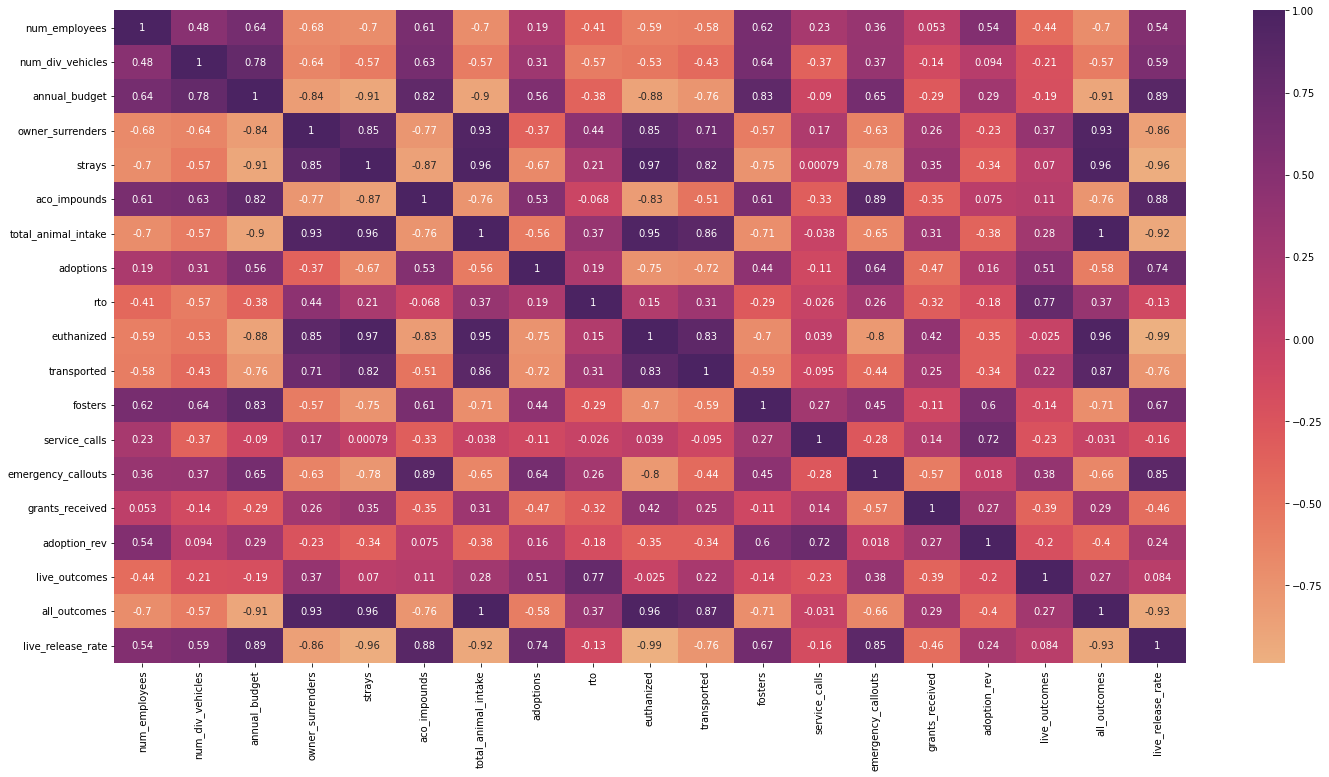

In [8]:
fig, ax = plt.subplots(figsize = (24,12))
ax = sns.heatmap(df.corr(), annot = True, cmap = 'flare')

The heatmap shows that the live release rate and total animal intake have a correlation value of -0.92. This suggests a strong negative correlation.

Most of the other correlation values make sense. For example, the total animal intake is positively correlated with owner surrenders and strays. This makes sense because the number of incoming owner surrenders and strays are calculated into the total animal intake. However, there are some things I am curious about.

- The annual budget has a relatively strong positive correlation with the live release rate, the total number of foster animals, and ACO impounds. So, I would be curious to see how their annual budget is laid out.
- The stray intake and ACO impounds have a correlation value of -0.87. The previous graphs show that the stray intake took a fairly sharp decline after the orgnization started conducting ACO impounds. My guess would be that when the ACO impound service started, the public started to rely more on Bloomington ACC to pick up stray animals as opposed to taking the animals in themselves. Or, maybe there was an ordinance change regarding stray animal intake.
- The amount of grants received did not have a strong correlation with any of the other values. Usually (not all of the time) grants for a city department or animal care organization are used for a specific project or program. Did the grants accomplish what Bloomington ACC hoped they would accomplish?
- Emergency callouts and ACO impounds are positively correlated. What constitues an emergency callout and is it possible for a callout to also count as an ACO impound?

## 2020

As menitoned before, data for the year 2020 showed some noticeable changes in numbers. For example, the total animal intake dropped by 29% from 2019 to 2020 and the number of adoptions dropped by 27% in the same span.

In [9]:
df['tai_change'] = df['total_animal_intake'].pct_change()
tai_change = df[['stat_year', 'total_animal_intake', 'tai_change']]

df['adopt_change'] = df['adoptions'].pct_change()
adopt_change = df[['stat_year', 'adoptions', 'adopt_change']]

tai_a_changes = pd.concat([tai_change, adopt_change], axis = 1, join = 'inner')
tai_a_changes.tail()

,stat_year,total_animal_intake,tai_change,stat_year,adoptions,adopt_change
13,2017,3598,-0.030450,2017,2297,-0.004335
14,2018,3629,0.008616,2018,2281,-0.006966
15,2019,3899,0.074401,2019,2684,0.176677
16,2020,2760,-0.292126,2020,1946,-0.274963
17,2021,3048,0.104348,2021,2176,0.118191


Anecdotally, these changes could be attributed to the COVID-19 pandemic. After some internet searching, the City of Bloomington website and Facebook [posts](https://www.facebook.com/COBAnimalShelter/photos/a.434194435271/10157800191385272) from Bloomington ACC indicates that Bloomington was under a Stay-at-Home order between March 2020 and May 2020. This in turn disrupted some of the services and foot traffic at Bloomington ACC.